# Finance Data Project - Bank Stock Analysis  

## Introduction  

This project focuses on exploratory data analysis (EDA) of stock prices. The objective is to practice visualization and data manipulation skills with a focus on financial data.  
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016. 

**Note:** The content here is intended for educational purposes and does not constitute financial advice.


## Data Loading

In this section, we'll load stock data using `pandas_datareader` and prepare it for analysis.


In [52]:
# Step 1: Import Libraries
import pandas_datareader.data as web   #pandas_datareader allows you to pull data from online sources like Yahoo Finance, Stooq, FRED, etc.
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

Stock information from Jan 1st 2006 to Jan 1st 2016 for each of the following banks will be obtained from Stooq:

- Bank of America
- CitiGroup
- Goldman Sachs
- JPMorgan Chase
- Morgan Stanley
- Wells Fargo

Each bank will be assigned to a separate DataFrame, named according to its respective ticker symbol. The process will involve the following steps:

1. Defining the start and end dates using Python's `datetime` module.
2. Identifying the correct ticker symbol for each bank.
3. Using the `datareader` function to retrieve stock data for each bank.





In [53]:
# Step 1: Set the Start and End Dates
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Explanation:
'''
📌 Why use datetime.datetime instead of datetime.date:
- `datetime.datetime(2006, 1, 1)` includes both the date and time (defaulting to 00:00:00).
- `datetime.date(2006, 1, 1)` only includes the date, with no time component.

⚡️ Why `datetime.datetime` is required for pandas_datareader:
- `pandas_datareader` expects a `datetime.datetime` object, as stock data includes timestamps for precision.
- Using `datetime.date` might work in some cases, but `datetime.datetime` is more precise and compatible with APIs like `pandas_datareader`.

Summary:
- Use `datetime.datetime(...)` because:
    1. It includes time for better precision.
    2. It's compatible with APIs.
    3. It avoids potential type errors.
''';


In [54]:
# Step 2: Identify Ticker Symbols
'''
Here are the ticker symbols for the banks:

| Bank            | Ticker |
|-----------------|--------|
| Bank of America | BAC    |
| CitiGroup       | C      |
| Goldman Sachs   | GS     |
| JPMorgan Chase  | JPM    |
| Morgan Stanley  | MS     |
| Wells Fargo     | WFC    |
''';

In [55]:
# Step 3: Retrieve Stock Data
'''
The data for each bank will be retrieved from the Stooq API (https://stooq.com), a free financial data provider. 
We use `web.DataReader(...)` to pull historical stock data for each bank from the Stooq database.

Note: Stooq returns data in reverse chronological order (most recent data first), so we use `.sort_index()` to reorder the data.
'''

# Bank of America
BAC = web.DataReader("BAC", 'stooq', start, end).sort_index()

# CitiGroup
C = web.DataReader("C", 'stooq', start, end).sort_index()

# Goldman Sachs
GS = web.DataReader("GS", 'stooq', start, end).sort_index()

# JPMorgan Chase
JPM = web.DataReader("JPM", 'stooq', start, end).sort_index()

# Morgan Stanley
MS = web.DataReader("MS", 'stooq', start, end).sort_index()

# Wells Fargo
WFC = web.DataReader("WFC", 'stooq', start, end).sort_index()


In [56]:
# Concatenate the bank dataframes together to a single data frame called bank_stocks.
tickers = 'BAC C GS JPM MS WFC'.split(" ")
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']


In [57]:
#we could also use pickle:
bank_stocks= pd.read_pickle('all_banks') 
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [58]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

## Exploratory Data Analysis (EDA)

Now we will explore the stock data by analyzing basic statistics and creating visualizations to gain insights into the behavior of the stocks.  
To examine various aspects of the data, we will answer a couple of key questions. These analyses will help uncover trends, patterns, and relationships, providing a deeper understanding of the performance of each bank's stock over time and how they compare with one another.  
Let's begin by analyzing the data step by step.


**1) What is the max Close price for each bank's stock throughout the time period?**

In [59]:
#Answer:

# Method 1: Using pd.IndexSlice to select and find the maximum close price
idx = pd.IndexSlice
max_close_method1 = bank_stocks.loc[:, idx[:, 'Close']].max().reset_index(level='Stock Info', drop=True)
max_close_method1

# Method 2: Using .xs() (it is the cross-section method which is used to select data at a particular level in a MultiIndex.) to get the 'Close' column for all banks and find the maximum close price
max_close_method2 = bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()
max_close_method2

# Method 3: Using a for loop to iterate through each bank ticker and print the max close price
for tick in tickers:
    print(tick, '   ', bank_stocks[tick]['Close'].max())


BAC     54.9
C     564.1
GS     247.92
JPM     70.08
MS     89.3
WFC     58.52


**Conclusion:**  
Looking at the results, it's evident that CitiGroup (C) reached the highest peak closing price during the period, standing out significantly above the other banks. Goldman Sachs (GS) also achieved impressive highs, indicating strong market performance. In contrast, Morgan Stanley (MS), JPMorgan Chase (JPM), Wells Fargo (WFC), and Bank of America (BAC) had relatively lower peak prices, suggesting more modest stock performance compared to the other banks during this time.

**2) Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.**


---
 📈 **What is a return?**

In finance, a return measures how much the price of a stock has changed over time, expressed as a percentage of the previous price. It's a way of saying, “How much did I gain or lose relative to what I had?”



🧮 The Formula

$$
r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1
$$

🔹 **Symbols:**

- $ r_t $: The return at time $t$
- $p_t$: The price at time $t$ (e.g., today)
- $p_{t-1}$: The price at time $t-1$ (e.g., yesterday)

🔹 **Explanation:**

The formula says:

Take the difference between today's price and yesterday's price, then divide it by yesterday's price.

This gives you a proportional change, or return.

🔹 **Two Equivalent Forms:**

**Traditional form:**

$$
r_t = \frac{p_t - p_{t-1}}{p_{t-1}}
$$

**Alternative form (algebraically equivalent):**

$$
r_t = \frac{p_t}{p_{t-1}} - 1
$$

Both give the same result — the second one is often easier to calculate in code.


✅ **Example:**

Suppose a stock's closing price yesterday was \$100, and today it’s \$105.

$$
r_t = \frac{105 - 100}{100} = \frac{5}{100} = 0.05 = 5\%
$$

So, you earned a 5% return.

💻 In Pandas Code:

If you have a DataFrame of prices, like `bank_stocks`, you can calculate the returns like this:  
returns = bank_stocks.xs('Close', axis=1, level='Stock Info').pct_change(), where:  
- `pct_change()` automatically applies the return formula row by row.
- `xs(..., level='Stock Info')` selects only the 'Close' prices across all banks.

---

We can use pandas' `pct_change()` method on the 'Close' column to calculate the daily returns for each bank's stock. We'll explore a few ways to achieve this. For example, we can create a for loop that iterates through each bank's stock ticker, computes the returns, and adds it as a new column in the `returns` DataFrame.





In [60]:
returns = pd.DataFrame()
# Method 1: Using a for loop to calculate daily returns for each bank
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change(fill_method=None)
returns.head()

# # Method 2: Using pd.IndexSlice to select 'Close' column and calculate returns
# idx = pd.IndexSlice
# returns = bank_stocks.loc[:, idx[:, 'Close']].pct_change(fill_method=None)
# returns.columns = ['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return', 'WFC Return']

# # Method 3: Using .xs() to extract 'Close' column and calculate returns
# returns = bank_stocks.xs('Close', axis=1, level='Stock Info').pct_change(fill_method=None)
# returns.columns = ['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return', 'WFC Return']


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**3) Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

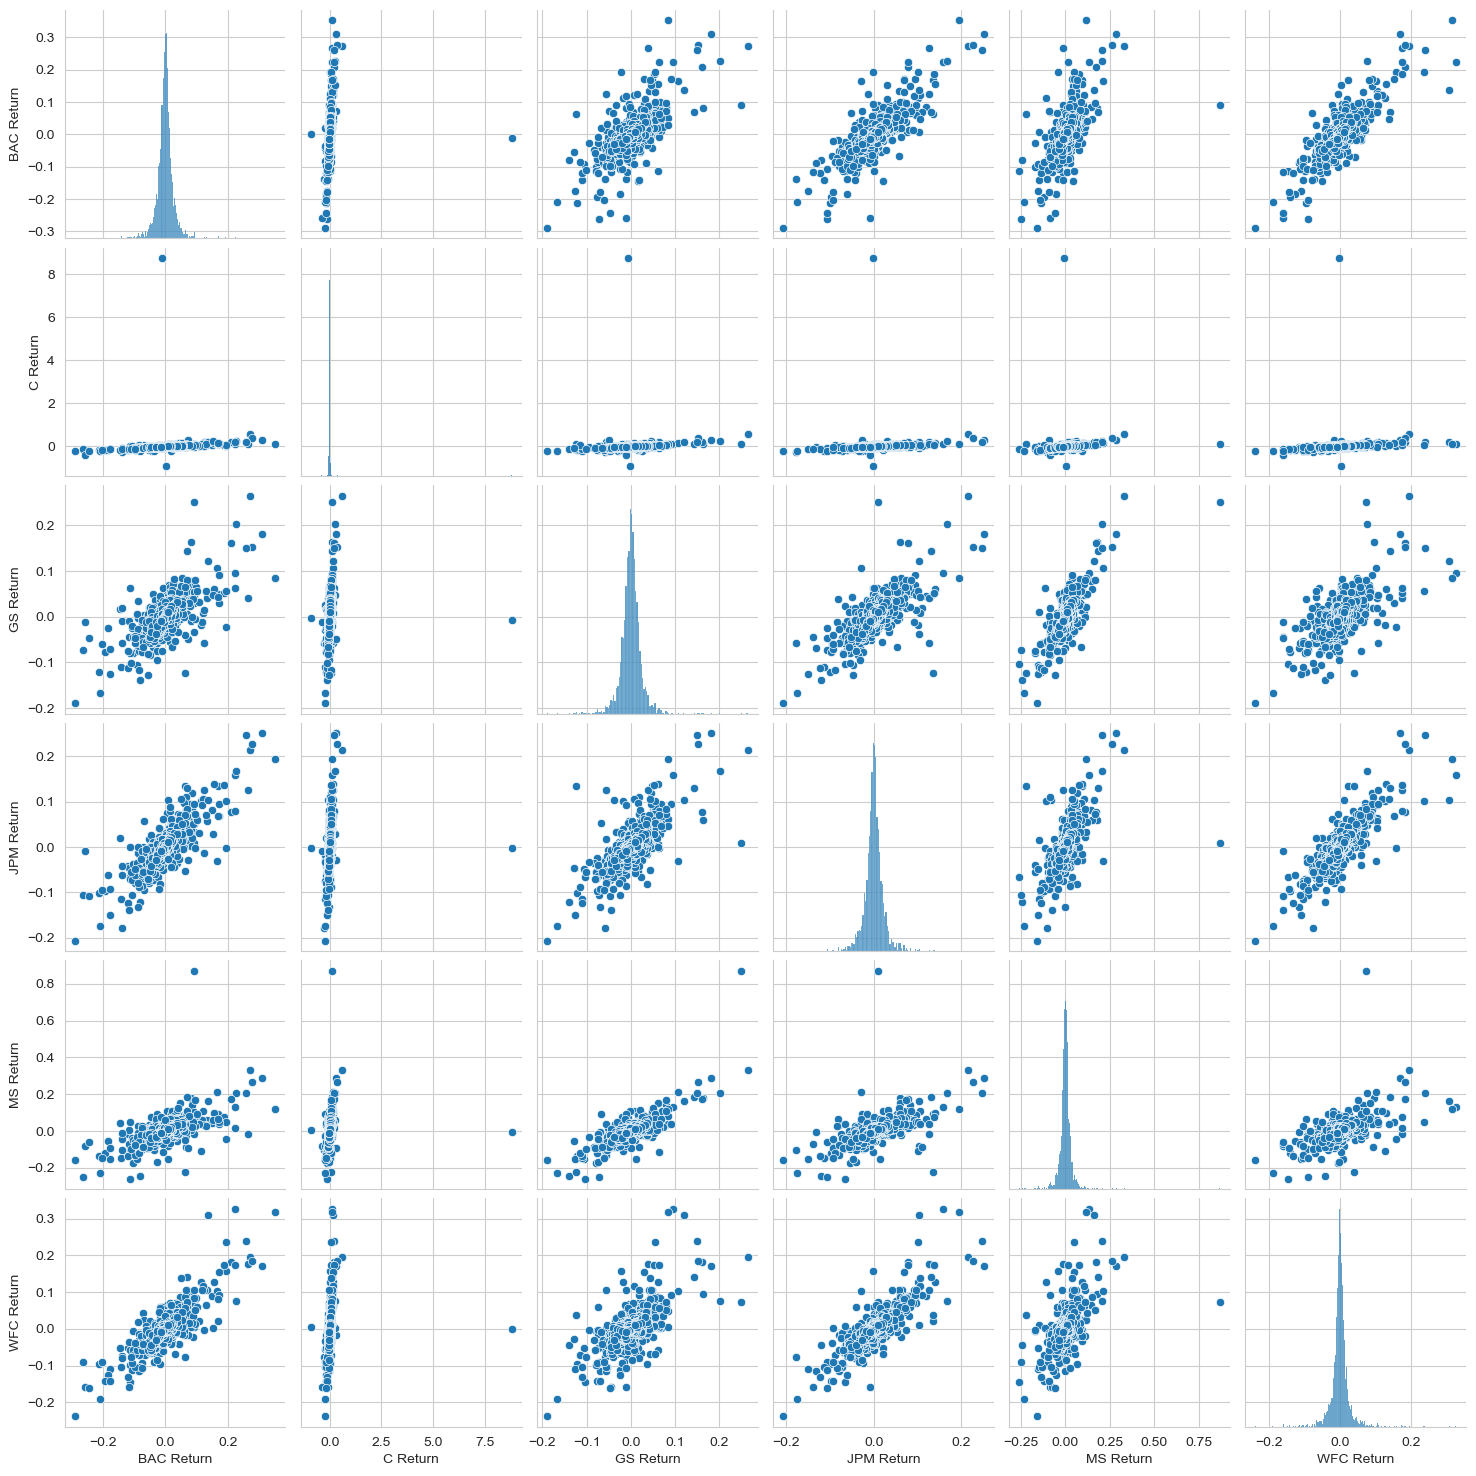

In [61]:
import seaborn as sns
sns.pairplot(returns);

**The unusual behavior of Citigroup's stock suggests that the bank was effectively insolvent by November 2008.** (We will explore this further later on.)

Now, let's supplement our seaborn `pairplot()` with numerical summaries to gain a deeper insight into each bank’s returns. We will summarize the returns using the `std()` (standard deviation) and `kurtosis()` (a measure of the "tailedness" of the distribution).


In [62]:
print("Standard Deviation (Volatility):")
print(returns.std().sort_values(ascending=False))
#Standard Deviation (Volatility): This tells us how much the returns vary — higher means more volatile.
#This helps us rank which bank had the most variable daily returns.

Standard Deviation (Volatility):
C Return      0.179969
MS Return     0.037820
BAC Return    0.036650
WFC Return    0.030233
JPM Return    0.027656
GS Return     0.025346
dtype: float64


 **1. Standard Deviation (Volatility)**

| Bank       | Std Dev (Volatility) | Interpretation                          |
|------------|----------------------|---------------------------------------|
| C          | 0.179969             | 🚨 Extremely volatile — big daily changes |
| MS, BAC    | ~0.036–0.037         | High, but not abnormal for bank stocks |
| WFC, JPM, GS | ~0.025–0.030       | Lower volatility — more stable         |

**🧠 Conclusion:**

Citigroup (C) had enormous price swings, consistent with the 2008 crash. It was unstable and risky.


In [63]:
print("Kurtosis:")
print(returns.kurtosis().sort_values(ascending=False))
#Kurtosis: This tells us how peaked and heavy-tailed the return distribution is.
# A kurtosis > 3 means more extreme outliers than a normal distribution.
# High kurtosis = tall peak, fat tails → what you're seeing with C Return.



Kurtosis:
C Return      2241.735556
MS Return      120.998445
WFC Return      25.826586
BAC Return      20.299142
GS Return       17.585938
JPM Return      15.933167
dtype: float64


**2. Kurtosis**

| Bank       | Kurtosis | Interpretation                                         |
|------------|----------|--------------------------------------------------------|
| C          | 2241.73  | 🚨 Off-the-charts extreme events (e.g., crash below $1 in 2008) |
| MS         | 121      | High — still saw extreme movements                      |
| Others     | 15–25    | High, but more typical for financial data               |

**🧠 Conclusion:**  
Citigroup (C)'s extremely high kurtosis indicates that it had much more extreme stock price movements (outliers) during the period under consideration, which may correlate with its financial struggles and near-insolvency.

The other banks had less volatile returns overall, as indicated by their much lower kurtosis values.


**What Does Kurtosis Tell You in Financial Data?**  

Kurtosis is a statistical measure that describes the shape of a distribution's tails in relation to a normal distribution. In simpler terms, it helps you understand the "peakedness" or "flatness" of a distribution.

Key Points:
- Normal distribution (bell curve) has a kurtosis value of 3, known as mesokurtic.
- Positive kurtosis (> 3) indicates that the data has heavy tails or outliers, meaning there are more extreme values than in a normal distribution. This is called leptokurtic.
- Negative kurtosis (< 3) indicates that the data has light tails or fewer outliers, meaning the data is more evenly distributed and less prone to extreme values. This is called platykurtic.  

In the context of stock returns (like those for the banks in our analysis), kurtosis helps us identify whether there are frequent extreme events (like sharp drops or rises in stock prices). For example, a high kurtosis for a stock could indicate that there were unexpected jumps or crashes in price during the time period we're analyzing, which is typical in volatile market conditions (e.g., the financial crisis).

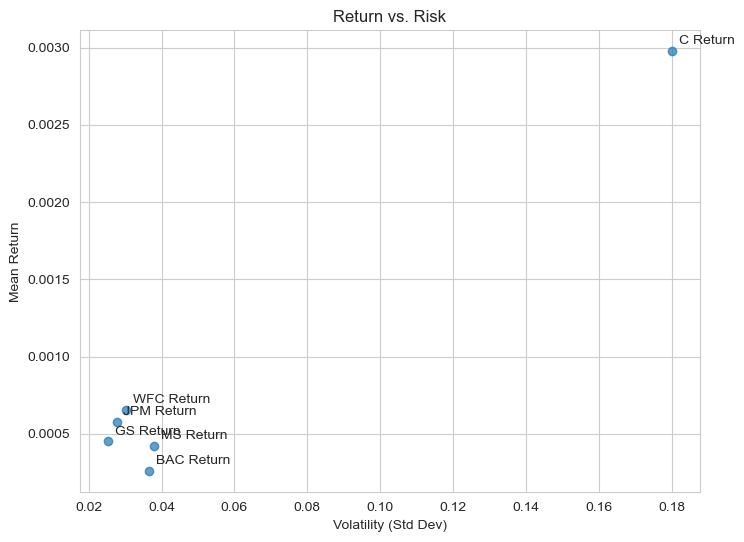

In [64]:
import matplotlib.pyplot as plt

mean_returns = returns.mean()
volatility = returns.std()

plt.figure(figsize=(8,6))
plt.scatter(volatility, mean_returns, alpha=0.7)

for label in returns.columns:
    plt.annotate(label, (volatility[label], mean_returns[label]), textcoords="offset points", xytext=(5,5))

plt.xlabel('Volatility (Std Dev)')
plt.ylabel('Mean Return')
plt.title('Return vs. Risk')
plt.grid(True)
plt.show()


Citigroup appears to give a higher return, but only if you're willing to tolerate enormous risk.

In real-world investing, such extreme volatility (as you saw from the kurtosis and std) makes it:

- Unpredictable
- Hard to manage in a portfolio
- Dangerous during crashes (as in 2008)

**🧠 Key Insight:**

Even if C Return is high on average, that doesn't make it a better investment unless you're specifically seeking high-risk, high-reward trades.

This is why we use metrics like the **Sharpe Ratio** to adjust returns for the amount of risk taken.


### **Context from the 2008 Financial Crisis and Citigroup's Experience:**

- Citigroup's stock price plunged dramatically during the 2007-2009 financial crisis, falling below $1 in early 2009 after being worth over $500 per share in early 2007 due to the crisis and government bailouts. The stock underwent a 1:10 reverse split in 2011 to adjust share price and outstanding shares. The government intervention included capital injections and loss-sharing agreements to stabilize the bank.

- The extreme volatility and risk during this period made investing in Citigroup unpredictable and dangerous. The bank faced massive losses, restructuring, and a crisis of confidence among investors.

- Such historic events illustrate why a high return alone does not imply a good investment without considering the associated risk and volatility.

---



In [65]:
# Calculate and compare Sharpe Ratios:
#We want stocks that have high returns with low risk. A simple metric is the Sharpe Ratio:
sharpe_ratios = returns.mean() / returns.std()
sharpe_ratios.sort_values(ascending=False)
# Now we look at who has the best return per unit of risk. The bank at the top of this list is the most efficient investment — not necessarily the one with the highest return alone.

WFC Return    0.021713
JPM Return    0.020786
GS Return     0.017791
C Return      0.016540
MS Return     0.011180
BAC Return    0.007031
dtype: float64

**Conclusion:**  
Based on the Sharpe Ratios, Wells Fargo (WFC) had the best return per unit of risk, making it the most efficient investment. JPMorgan Chase (JPM) also showed strong performance, ranking second. Goldman Sachs (GS) and Citigroup (C) had moderate Sharpe Ratios, indicating a good return but with more risk. Morgan Stanley (MS) and Bank of America (BAC) had the lowest Sharpe Ratios, suggesting they were less efficient in terms of risk-adjusted returns.

In conclusion, Wells Fargo (WFC) was the most efficient investment in terms of risk-adjusted returns, while Bank of America (BAC) was the least efficient.

**Summary of Results: Citigroup and the 2008 Financial Crisis**

When we looked at stock data from 2006 to 2016 for some of the biggest U.S. banks, Citigroup (Ticker: C) really stood out.

- Using Seaborn’s pairplot to visualize daily returns, we noticed Citigroup’s returns had a very different shape compared to other banks — with those skinny, heavy tails in the histograms showing lots of extreme ups and downs.

- The numbers backed this up:
  - Citigroup had the highest volatility (standard deviation around 0.18), way above its peers.
  - It also had an insanely high kurtosis (about 2241), meaning it experienced rare but huge swings — classic signs of a crisis.

This all ties back to the 2008 financial meltdown, when Citigroup:

- Took massive losses  
- Needed a government bailout  
- Saw its stock price crash by over 95%  
- Went through wild price swings, just like our data shows.

What this tells us is that big market events leave clear marks in the data — and Citigroup’s 2008 collapse is a textbook example.
Background on [Citigroup's Stock Crash available here](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29). "By July 2008 Citigroup was described as struggling, and by November they were insolvent"

You'll also see the enormous crash in value if you take a look at the stock price plot (which we do later in the visualizations.)

---

**4) Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

**5) You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame?**

In [66]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Method 1:

In [67]:
# To get the dates (index values) where each column (e.g., 'BAC Return', 'C Return', etc.) has its maximum value, we can use:
returns.idxmax() # idxmax() returns the index label (i.e., the date) where the maximum value occurs for each column.


BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [68]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

Method 2:

In [69]:
min_stocks = pd.Series()
for tick in tickers:
    min_stocks[tick+' Return'] = returns.reset_index().iloc[returns[tick+' Return'].argmin()]['Date']
min_stocks
#or
# returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [70]:
min_stocks = pd.Series({f"{tick} Return": returns[f"{tick} Return"].idxmin() for tick in tickers})
min_stocks

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**Conclusion:**

1. Four major banks — Bank of America (BAC), Goldman Sachs (GS), JPMorgan Chase (JPM), and Wells Fargo (WFC) — experienced their worst single-day stock drops on January 20, 2009, the day of President Obama’s inauguration. This occurred during the lingering panic of the 2008 financial crisis. The sharp declines were driven by disappointing earnings reports, continued credit losses, and uncertainty surrounding the government’s response. This dramatic market reaction highlights the instability and fragility of the financial system at that time.

2. Citigroup (C) experienced an unusual price swing in early May 2011. The stock plummeted on May 6, 2011, and then surged on May 9, 2011 due to a 1-for-10 reverse stock split that took effect on the 9th. A reverse stock split consolidates shares to increase the stock price — in this case, 10 shares became 1. The apparent drop and subsequent jump were not driven by changes in the company’s value, but rather by the mechanics of the split. These movements are technical in nature and should not be interpreted as a fundamental shift in market sentiment.
---


**6) Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [71]:
# Standard deviation measures how much a stock’s returns fluctuate around the average, in other words, its volatility or risk. 
# A higher standard deviation means more price swings and greater risk.
print("Standard Deviation (Volatility):")
print(returns.std().sort_values(ascending=False))
#Standard Deviation (Volatility): This tells us how much the returns vary — higher means more volatile.
#This helps us rank which bank had the most variable daily returns.

Standard Deviation (Volatility):
C Return      0.179969
MS Return     0.037820
BAC Return    0.036650
WFC Return    0.030233
JPM Return    0.027656
GS Return     0.025346
dtype: float64


**Riskiest stock overall:** **Citigroup (C)**, with a standard deviation of about 0.18 — much higher than the others, indicating it had the most volatile returns over the entire period.

In [72]:
returns_2015 = returns.loc['2015-01-01': '2015-12-31']
#or
# returns_2015 = returns.loc['2015']
returns_2015

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189
2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422
2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865
2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951
2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [73]:
print("Standard Deviation (Volatility) 2015:")
print(returns_2015.std().sort_values(ascending=False))

Standard Deviation (Volatility) 2015:
MS Return     0.016249
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
WFC Return    0.012591
dtype: float64


 **Riskiest stock in 2015:** **Morgan Stanley (MS)**, based on the standard deviation of returns in 2015, Morgan Stanley (MS) emerged as the riskiest stock, with the highest volatility (standard deviation of 0.016249). This indicates that MS experienced the most fluctuations in its stock price compared to the other banks during that year, suggesting greater market uncertainty or price swings. While the other banks also had significant volatility, MS stood out with slightly higher variability, highlighting its higher risk in 2015.

**Interpretation**

- **Standard deviation** is a key measure of volatility, showing how widely prices move from their average.  
- A stock with a high standard deviation experiences bigger price swings and is considered riskier.  
- Over the full time period, Citigroup was clearly the most volatile and risky stock.  
- However, in 2015, volatility shifted, and Morgan Stanley became the riskiest among these banks.  
- This shows that risk can change over time, so it’s important to look at volatility within specific periods, not just overall.

---

**7) Create a histplot using seaborn of the 2015 returns for Morgan Stanley**

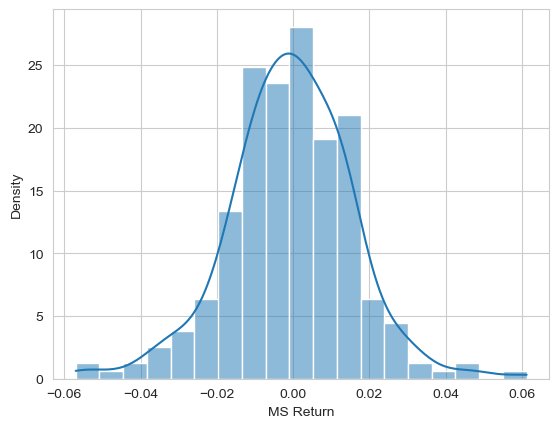

In [74]:
sns.histplot(returns_2015['MS Return'], kde=True,stat='density');

**Conclusion:**  
- Morgan Stanley's 2015 returns were relatively stable, with most daily returns clustering near zero.  
- The stock had some large positive returns (indicated by the right tail), but these were infrequent.  
- The right-skewed distribution suggests that positive returns occurred more sporadically compared to negative or near-zero returns.

**8) Create a distplot using seaborn of the 2008 returns for CitiGroup**

In [75]:
print("Standard Deviation (Volatility) 2008:")
print(returns_2008.std().sort_values(ascending=False))

Standard Deviation (Volatility) 2008:
MS Return     0.087604
C Return      0.073573
BAC Return    0.062934
JPM Return    0.053134
WFC Return    0.052439
GS Return     0.050015
dtype: float64


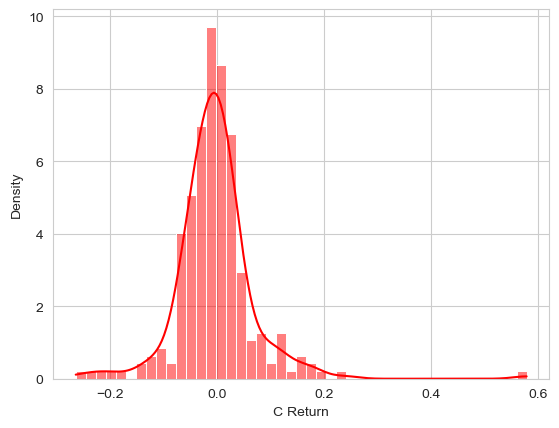

In [76]:
returns_2008 = returns.loc['2008-01-01': '2008-12-31']
sns.histplot(returns_2008['C Return'], kde=True, color = 'RED', stat='density');

**Conclusion:**  
- CitiGroup’s stock in 2008 was highly volatile, with a significant skew towards negative returns (the spread of the histogram suggests that CitiGroup's stock had a wide range of returns in 2008, indicating high volatility).  
- While there were occasional small positive returns, the stock mainly experienced large negative fluctuations, which corresponds with the global market instability caused by the financial crisis.
- This plot is useful for understanding the risks of holding CitiGroup’s stock in 2008, showing that it was a high-risk investment with frequent losses during the financial turmoil.


____
# Additional Visualizations

This project emphasizes the use of various visualization tools such as **Seaborn**, **Matplotlib**, **Plotly**, **Cufflinks**, and **Pandas**. These visualizations will play a key role in providing deeper insights into the data, helping us better understand patterns, trends, and relationships within the financial data.


### Imports

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**9) Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [78]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [79]:
'''
Method 1: Using .filter()
    This method simply selects all columns containing 'Close' from the bank_stocks DataFrame.
    Reason: It's a straightforward approach without dealing with the MultiIndex directly.
'''
# s = bank_stocks.filter(like='Close', axis=1)
# s.plot(figsize=(12, 4));

'''
Method 2: Using List Comprehension with MultiIndex
    It's simply selecting the 'Close' columns from the bank_stocks DataFrame using a list comprehension based on the MultiIndex.
    Reason: It's a simple but efficient way to handle MultiIndex DataFrames.
'''
# close_cols = [col for col in bank_stocks.columns if col[1] == 'Close']
# s = bank_stocks[close_cols]
# s.plot(figsize=(12, 4));

'''
Method 3: Using .xs() (Cross-section Method)
    Uses .xs() to select the 'Close' column for all banks, then plots the data.
    Reason: Slightly more advanced than Method 2 but still easy to implement with good control over the MultiIndex.
'''
# bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize = (12, 4));

'''
Method 4: Using a for loop
    This method loops through tickers and plots each bank's closing price individually.
    Reason: This is simple but slightly more flexible as it allows for fine-grained control over the plotting process.
'''
# for tick in tickers:
#     bank_stocks[tick]['Close'].plot(label = tick, figsize=(12, 4))
# plt.legend();

'''
Method 5: Using Matplotlib
    Extracts 'Close' prices using MultiIndex and plots them using Matplotlib.
    Reason: This involves a bit more customization in terms of labeling and adding elements like a legend.
'''
# close_df = bank_stocks.xs(key='Close', axis=1, level='Stock Info')
# plt.figure(figsize=(12, 4))
# for column in close_df.columns:
#     plt.plot(close_df.index, close_df[column], label=column)
# plt.title('Bank Closing Prices (2006–2016)')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend(title='Bank Ticker')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

'''
Method 6: Using Cufflinks
    This method uses Cufflinks (integrated with Plotly and Pandas) to create interactive plots.
    Reason: This is a bit more complex because it integrates with Plotly for interactive visualizations.
'''
# close_df = bank_stocks.xs(key='Close', axis=1, level='Stock Info')
# close_df.iplot(kind='line',title='Bank Closing Prices (2006–2016)', xTitle='Date', yTitle='Price', dimensions=(900, 400), line_width=2);

'''
Method 7: Using Cufflinks with Date Formatting
    This method also uses Cufflinks but converts the index to a string format to ensure proper handling of date values.
    Reason: This is slightly more complex than Method 3 due to additional data manipulation (e.g., index conversion).
'''
# df = bank_stocks.xs(key='Close', axis=1, level='Stock Info').copy()
# df.index = df.index.astype(str)  # Convert datetime index to string
# df.iplot(title='Stock Close Prices', xTitle='Date', yTitle='Price')

'''
Method 8: Using Plotly Graph Objects
    This method uses Plotly’s graphing API, which is more flexible and allows customization.
    Reason: This is the most advanced, as it involves Plotly's lower-level API, allowing complete control over the plot but requiring more complex code.
'''
df = bank_stocks.xs('Close', level='Stock Info', axis=1)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
df.index = df.index.astype(str)  # Fix warning if needed
df.iplot(
    title='Stock Closing Prices',
    xTitle='Date',
    colors=colors,
    yTitle='Price',
    asFigure=True  # Get the figure to modify layout
).update_layout(
    hovermode='x unified'  # <-- This is the key setting
).show()

'''
Method 9: Using .stack() and Seaborn Lineplot
    This method stacks the data, resets the index, and uses Seaborn for a line plot.
    Reason: This involves transforming the data structure (stacking) and using Seaborn, which is more advanced compared to other methods.
''';
# stacked = bank_stocks.xs('Close', level='Stock Info', axis=1).stack().reset_index()
# stacked.columns = ['Date', 'Bank', 'Close']
# plt.figure(figsize=(12, 4))
# sns.lineplot(data=stacked, x='Date', y='Close', hue='Bank');

**Analysis of the plot (2006–2016 Bank Closing Prices):**

The chart of bank closing prices over this period vividly illustrates the divergent trajectories these institutions took through the financial crisis and recovery years:

- Citigroup (orange): Citigroup’s collapse is the most striking feature—its share price plunged from $500+ in 2007 to below $50 by early 2009. This reflects not only the bank’s near-insolvency and massive federal bailout but also the lasting impact of share dilution and corporate restructuring. Even by 2016, Citigroup had not returned to pre-crisis levels.

- Goldman Sachs (green): Goldman Sachs experienced a sharp decline in 2008, but far less severe than Citigroup’s. Its stock fell from $230+ to around $25, then staged a robust recovery, climbing back toward $200 by 2016. This resilience underscores Goldman’s stronger capital position and quicker rebound.

- JPMorgan Chase (red): JPMorgan’s price drop—while significant—was comparatively moderate, and its subsequent recovery was the steadiest among the group, ending near $60 by 2016. This stability highlights JPMorgan’s relative strength in weathering the crisis.

- Wells Fargo (brown) & Morgan Stanley (purple): Both banks suffered substantial drawdowns (>70%) but mounted respectable recoveries into the $40–$60 (WFC) and $30–$60 (MS) ranges. Their performance reflects solid post-crisis management, though neither fully regained pre-crisis peaks.

- Bank of America (blue): BAC endured one of the deepest plunges and its recovery was more muted, remaining below $20 through 2016. This underperformance signals lingering market concerns about its balance sheet and strategic challenges.

Key Takeaway:  
Citigroup’s dramatic fall—and its struggle to recover—stands in stark contrast to its peers. Goldman Sachs and JPMorgan Chase emerged as the most resilient, while Bank of America and Morgan Stanley lagged. Overall, this plot encapsulates both the severity of the 2008 crisis and the varied recovery paths, highlighting which institutions were best-capitalized and managed in its aftermath.

In [80]:
close_df = bank_stocks.xs(key='Close', axis=1, level='Stock Info')
normalized = close_df / close_df.iloc[0]
normalized.index = normalized.index.astype(str)  # Fix warning if needed
normalized.iplot(title='Normalized Closing Prices', xTitle='Date', yTitle='Relative Price');

'''
Using .iloc[0] in the normalization:
    normalized = close_df / close_df.iloc[0]
means you're dividing each stock’s entire time series by its initial price (i.e., the price on the first date in the dataset, 2006-01-03).

🔍 Why normalize with .iloc[0]?
This transforms the data so that all stocks start at 1.0 on the first date. It makes it easy to:

✅ Compare relative performance over time
✅ Ignore differences in absolute price levels

🧠 Summary
Using .iloc[0] is a common technique to standardize time series for relative comparison. It answers:
    "Which stock performed better in terms of growth, regardless of price?"
''';

---

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**What is a Moving Average?**

A moving average (MA) is a way to smooth out short-term ups and downs in time series data, helping you see the bigger picture — the long-term trends or patterns.



**Why It's Called "Moving"**

- It calculates the average of a fixed number of recent data points (like the last 30 days).  
- As time moves forward, the window shifts forward one day at a time.  
- So, you're always averaging the most recent N values, such as the past 30 closing prices.



**Example: 30-Day Moving Average**

Imagine a stock’s closing prices over 5 days:  
`[10, 12, 13, 15, 14]`

A 3-day moving average starting on Day 3 would be:

| Day | Calculation           | Result  |
|------|----------------------|---------|
| 3    | (10 + 12 + 13) / 3   | 11.67   |
| 4    | (12 + 13 + 15) / 3   | 13.33   |
| 5    | (13 + 15 + 14) / 3   | 14.00   |



**Why Use a Moving Average?**

- To reduce noise in volatile data like stock prices.  
- To identify trends more easily.  
- Commonly used in technical analysis for trading:  
  - Short-term MAs (e.g., 10-day, 30-day) react quickly to recent changes.  
  - Long-term MAs (e.g., 100-day, 200-day) show more stable, long-term trends.


Moving averages are a fundamental tool for traders and investors to smooth out price data and spot trends, helping make better-informed decisions.

---


**10) Plot the rolling 30-day average against the Close Price for Bank Of America's stock for the year 2008.**

In [81]:
'''
Method 1: Pandas .plot() with rolling (easiest)
A one-liner that uses Pandas’ built-in plotting on the rolling mean and actual close price.
'''
# Method 1: Pandas built-in plot with rolling mean
# BAC = bank_stocks['BAC']
# BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30-Day MA')  
# BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')  
# plt.legend();  


'''
Method 2: Basic Matplotlib overlay
Explicitly plot both series with Matplotlib for full control over styling.
'''
# Method 2: Basic Matplotlib overlay
# bac_close = bank_stocks['BAC']['Close']['2008']
# rolling_avg_30 = bac_close.rolling(window=30).mean()

# plt.figure(figsize=(12, 6))
# plt.plot(bac_close, label='BAC Close (2008)', color='blue')
# plt.plot(rolling_avg_30, label='30-Day MA', color='orange', linewidth=2)
# plt.title('BAC Close vs. 30-Day Moving Avg (2008)')
# plt.xlabel('Date'); plt.ylabel('Price')
# plt.legend(); plt.tight_layout(); plt.show()

'''
Method 3: Matplotlib + DateFormatter
Same as Method 2, but with nicely formatted date ticks for readability.
'''
# Method 3: Matplotlib + formatted x-axis dates
# import matplotlib.dates as mdates

# bac_2008 = bank_stocks.xs('Close', level='Stock Info', axis=1)['BAC']['2008']
# ma_30    = bac_2008.rolling(window=30).mean()

# plt.figure(figsize=(12, 6))
# plt.plot(bac_2008, alpha=0.6, label='BAC Close')
# plt.plot(ma_30, color='red', label='30-Day MA')

# ax = plt.gca()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# ax.xaxis.set_major_locator(mdates.MonthLocator())

# plt.title('BAC Stock & 30-Day MA (2008)')
# plt.xlabel('Date'); plt.ylabel('Price')
# plt.xticks(rotation=45); plt.legend()
# plt.tight_layout(); plt.show()

'''
Method 4: Plotly Graph Objects (hardest)
An interactive Plotly chart with two traces and custom layout.
'''
# Method 4: Plotly Graph Objects interactive plot
import plotly.graph_objects as go

df_2008 = bank_stocks.xs('Close', level='Stock Info', axis=1)['BAC']['2008']
ma_30   = df_2008.rolling(window=30).mean()

fig = go.Figure([
    go.Scatter(x=df_2008.index, y=df_2008, name='BAC Close'),
    go.Scatter(x=ma_30.index,   y=ma_30,   name='30-Day MA')
])
fig.update_layout(
    title="BAC Close Price & 30-Day MA (2008)",
    xaxis_title="Date", yaxis_title="Price",
    xaxis=dict(tickformat="%b %Y"),
    hovermode='x unified'
)
fig.show()

**11) Create a heatmap of the correlation between the stocks Close Price.**

In [82]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

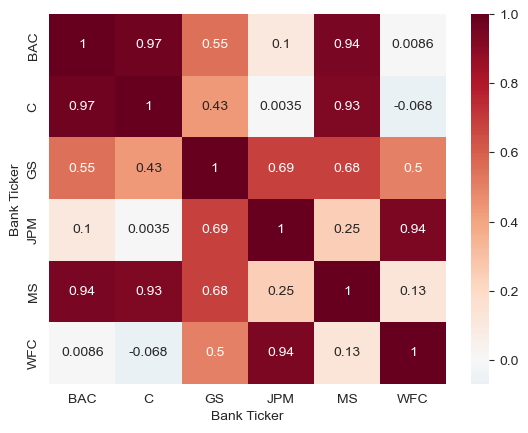

In [83]:
u = bank_stocks.xs(key='Close', axis=1, level= 'Stock Info').corr()
sns.heatmap(data=u,cmap="RdBu_r", annot=True , center=0);

**12) Use seaborn's clustermap to cluster the correlations together:**

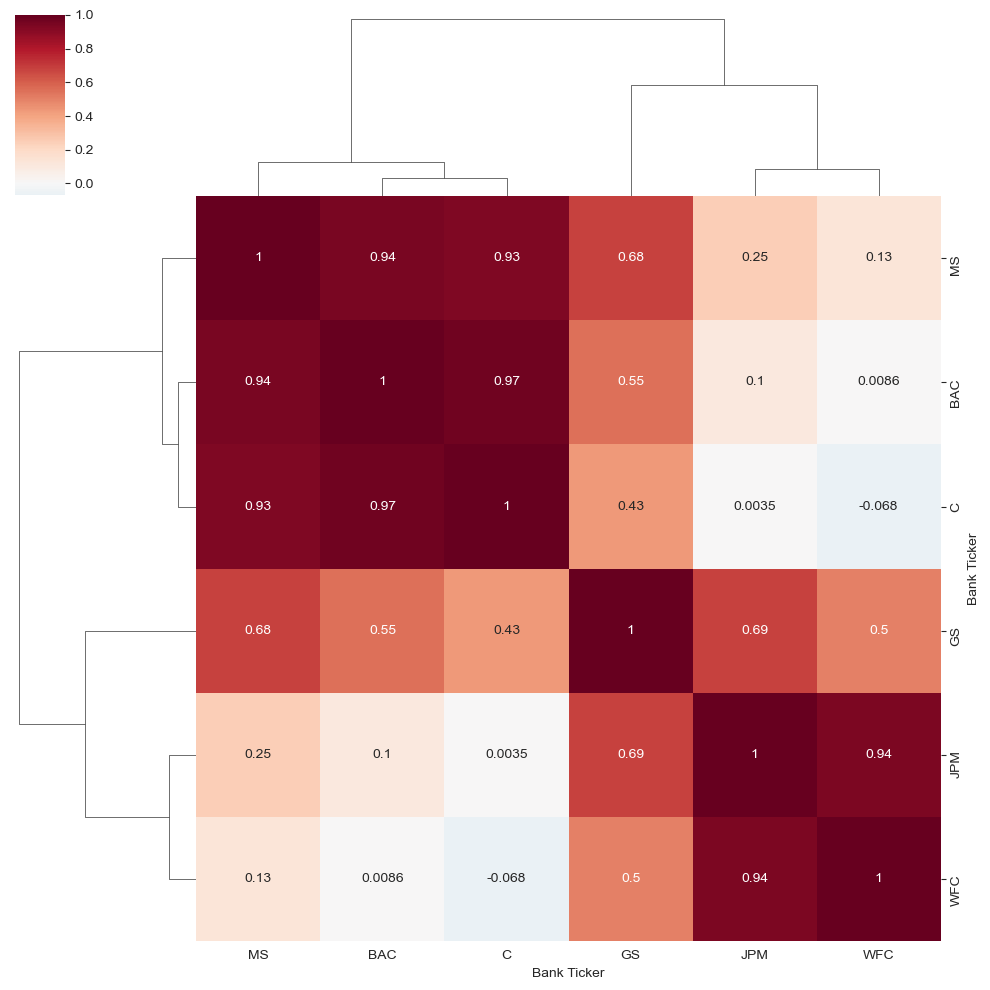

In [84]:
u = bank_stocks.xs(key='Close', axis=1, level= 'Stock Info').corr()
sns.clustermap(data=u,cmap="RdBu_r", annot=True , center=0);

**Conclusion:**  

The clustered heatmap reveals two clear groups of banks whose daily close‐price returns moved closely together from 2006–2016:

- Cluster 1: Morgan Stanley, Bank of America, and Citigroup all exhibit very high mutual correlations (0.93–0.97), indicating they reacted almost identically to market events.

- Cluster 2: JPMorgan Chase and Wells Fargo are tightly linked (0.94), with Goldman Sachs joining them at a moderate correlation (0.69).

Notably, Citigroup and Wells Fargo have the weakest relationship (–0.07), underscoring how their return paths diverged most sharply. Overall, these groupings suggest that banks with similar risk profiles or business focuses tended to move in sync, while others followed distinct trajectories.

In [85]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale="RdBu")

# Part 2 

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. 

**13) Use .iplot(kind='candle') to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [86]:
BAC = bank_stocks['BAC']
BAC.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


In [87]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Understanding the Candlestick Plot (iplot(kind='candle'))**

Candlestick plots are widely used in financial analysis to show price movements over time. Unlike box plots, they do **not** display quartiles like Q1, median, or Q3.



**How Each Candlestick Is Formed**

Each candlestick represents one time period (usually one day) and is composed of four key values:

| Part of Candle | Value from Data                                         | Description                         |
|----------------|--------------------------------------------------------|-----------------------------------|
| Top wick       | High                                                   | Highest price of the day           |
| Bottom wick    | Low                                                    | Lowest price of the day            |
| Top of box     | Close (if price went up) or Open (if price went down) | Depends on whether price rose or fell that day |
| Bottom of box  | Open (if price went up) or Close (if price went down) | Same idea, inverted                |



**Candle Box Logic**

- **If Close > Open:**  
  - The box is green (or white).  
  - Top of the box = Close  
  - Bottom of the box = Open  

- **If Close < Open:**  
  - The box is red (or black).  
  - Top of the box = Open  
  - Bottom of the box = Close  

- The wicks (thin lines above and below the box) extend from:  
  - Top wick = High  
  - Bottom wick = Low  


**Important Clarification**

This is **not** a box plot, so quartiles like Q1, median, and Q3 are **not** used here at all.



**Additional Notes**

- Candlestick charts provide a quick visual summary of price action: open, close, high, and low prices within each time period.  
- The color and shape of the candlestick help traders quickly see if the market was bullish (price went up) or bearish (price went down).  
- The length of the candle’s body and wicks can indicate the strength of buying or selling pressure and market volatility.

---


**14) Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [88]:
# We want to plot specific Simple Moving Averages (SMA) with custom windows like 13, 21, and 55 days on Morgan Stanley's stock (Close) for the year 2015 using Cufflinks:

# Get MS data for 2015
ms = bank_stocks['MS']
ms_2015 = ms.loc['2015'].copy()  # IMPORTANT: use .copy() to avoid SettingWithCopyWarning
ms_2015.index = ms_2015.index.astype(str)  # Fix warning if needed
# Calculate custom SMAs
ms_2015['SMA(close,13)'] = ms_2015['Close'].rolling(window=13).mean()
ms_2015['SMA(close,21)'] = ms_2015['Close'].rolling(window=21).mean()
ms_2015['SMA(close,55)'] = ms_2015['Close'].rolling(window=55).mean()


# Method 1: Cufflinks SMA plot (easiest) (hovermode cannot be set via .iplot(), we should use Plotly directly for that)
ms_2015[['Close','SMA(close,13)','SMA(close,21)','SMA(close,55)']].iplot(
    title='MS Close & SMAs (13, 21, 55)',
    xTitle='Date', yTitle='Price',
    mode='lines'
)

In [89]:
# Method 2: Plotly GO (harder)
import plotly.graph_objects as go

fig = go.Figure([
    go.Scatter(x=ms_2015.index, y=ms_2015['Close'],          mode='lines', name='Close'),
    go.Scatter(x=ms_2015.index, y=ms_2015['SMA(close,13)'],  mode='lines', name='SMA(13)'),
    go.Scatter(x=ms_2015.index, y=ms_2015['SMA(close,21)'],  mode='lines', name='SMA(21)'),
    go.Scatter(x=ms_2015.index, y=ms_2015['SMA(close,55)'],  mode='lines', name='SMA(55)')
])
fig.update_layout(
    title='MS Close & SMAs (13, 21, 55)',
    xaxis_title='Date', yaxis_title='Price',
    hovermode='x unified'
)
fig.show()

In [93]:
# Method 3: .ta_plot()
# ms_2015['Close'].ta_plot(study='sma', title='MS Close & SMAs (13, 21, 55)', periods=[13,21,55])
#or
import plotly.graph_objects as go

# 1) Generate the raw figure dict
fig_dict = ms_2015['Close'].ta_plot(
    study='sma',
    periods=[13,21,55],
    asFigure=True
)

# 2) Wrap it in a Plotly Figure
fig = go.Figure(fig_dict)

# 3) Now you can update the layout
fig.update_layout(
    title='MS Close & SMAs (13, 21, 55)',
    xaxis_title='Date',
    yaxis_title='Price'
)

# 4) Display it
fig.show()

**15) Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [91]:
'''
What Does .ta_plot(study='boll') Do?
.ta_plot() is a Cufflinks method for creating technical analysis plots — charts that traders often use to analyze stock prices.
When you call:
   your_dataframe.ta_plot(study='boll')
You're asking Cufflinks to plot Bollinger Bands, a popular technical indicator.

What Are Bollinger Bands?
Bollinger Bands consist of three lines:
Middle Band = Simple Moving Average (usually over 20 days).
Upper Band = Middle Band + (2 × standard deviation).
Lower Band = Middle Band – (2 × standard deviation).

They help visualize:
Volatility (how much the stock price moves).
Overbought/Oversold conditions.
'''
# How to Implement It for Bank of America in 2015:
import cufflinks as cf
cf.go_offline()

# Select Bank of America data
bac = bank_stocks['BAC']['Close']

# Filter for 2015
bac_2015 = bac.loc['2015'].copy()
bac_2015.index = bac_2015.index.astype(str)  # Fix warning if needed
# Plot Bollinger Bands
bac_2015.ta_plot(study='boll', title='Bollinger Bands for BAC (2015)');

# 🔍 Optional: Customize It
# You can adjust parameters like the moving average window or standard deviation multiplier with:
# bac_2015.ta_plot(study='boll', period=20, std=2)



This Bollinger Band chart for Bank of America’s 2015 closing prices shows three key lines:

- Middle Band (µ): the 20-day simple moving average of BAC’s close
- Upper Band (µ + 2σ): two standard deviations above the SMA
- Lower Band (µ – 2σ): two standard deviations below the SMA

**What to look for:**  

Volatility changes:  
- Where the bands narrow (e.g. around May–June), volatility is low and price movements are more muted.
- Where the bands widen (e.g. Jan–Feb and August–September), volatility spikes and price swings become larger.

Overbought/oversold signals:  
- Touches of the upper band (e.g. late November) can indicate overbought conditions—prices are high relative to their recent average.
- Touches of the lower band (e.g. mid-January and late August) signal oversold conditions—prices are low and may be due for a bounce.

Mean reversion:  
- After extreme touches, the price often “reverts” toward the middle band. For instance, the dip below the lower band in August is followed by a rally back toward the SMA in September.

Specific observations for 2015:  
- January–February: Bands were moderately wide—volatility was elevated—but BAC’s price tested the lower band boundary without breaching it, indicating increased downside pressure that ultimately reverted. 
- May–June: Bands tighten as volatility subsides; prices oscillate close to the SMA.
- Late August: A second volatility spike pushes prices below the lower band, again followed by a recovery.
- November–December: The bands expanded slightly year-end, and BAC tested the upper band boundary without crossing it, showing sustained upside momentum but no true overbought breakout.

Overall, the plot captures how BAC’s volatility ebbed and flowed in 2015 and highlights textbook overbought/oversold “bounces” around the Bollinger Bands.

**Understanding Volatility, Standard Deviation, and Bollinger Bands**

These three concepts are closely related but distinct. Here’s a clear breakdown of each and how they connect:


**1. Volatility**

- **Definition:** How much and how quickly a stock’s price moves.  
- **Measurement:** Often measured using **standard deviation**.  
- **Types:**  
  - *Historical volatility:* Past price fluctuations.  
  - *Implied volatility:* Expected future volatility (from options pricing).  

> Think of volatility as the big-picture concept of price movement.



**2. Standard Deviation (σ)**

- **Definition:** A statistical measure of how spread out values are from the average (mean).  
- **In finance:** Shows how much a stock’s return deviates from its average return.  
- **Insight:** A higher standard deviation means higher volatility.  

**Example:**  
A stock with a daily return std dev of 2% is more volatile than one with 1%.



3. Bollinger Bands

- **Definition:** A technical indicator using standard deviation to create volatility boundaries around a moving average.  
- **Components:**  
  - *Middle Band:* Usually a 20-day simple moving average (SMA).  
  - *Upper Band:* SMA + (2 × standard deviation).  
  - *Lower Band:* SMA − (2 × standard deviation).  

> Bollinger Bands visualize volatility by showing how far prices move around the average.



**Relationship Summary**

| Concept            | What It Measures              | How It's Used               | Related To                |
|--------------------|------------------------------|----------------------------|---------------------------|
| **Volatility**     | General price fluctuation      | Risk analysis, trading      | Measured by std deviation  |
| **Standard Deviation** | Statistical spread of data   | Quantifies volatility       | Core of Bollinger Bands    |
| **Bollinger Bands** | Volatility envelope using SMA ± 2σ | Trading signals, patterns | Visualizes volatility      |



**Practical Insights**

- **Volatility:** The concept of price movement.  
- **Standard deviation:** The measure of volatility.  
- **Bollinger Bands:** The visualization of volatility on trading charts.


**Visualizing Volatility with Bollinger Bands**

- When volatility is **high**, the bands **widen** (move farther apart).  
- When volatility is **low**, the bands **contract** (move closer together).  

> The distance between the upper and lower bands gives a visual cue of market activity.

**Example:**  
- Market turbulence or earnings announcements → 📊 wide bands  
- Calm periods → 📊 narrow bands



**Overbought and Oversold Signals**

- **Overbought:** Price too high, might fall soon.  
- **Oversold:** Price too low, might rise soon.  

**How to interpret:**  
- Price touching or exceeding the **upper band** → possibly overbought.  
- Price touching or dropping below the **lower band** → possibly oversold.  

> ⚠️ Important: These are signals, not guarantees. Combine with other tools for better decisions.



**Summary Table**

| Band Position   | Interpretation    | Action (Not Always!)       |
|-----------------|-------------------|----------------------------|
| Above Upper     | Possibly Overbought | Watch for reversal down    |
| Below Lower     | Possibly Oversold   | Watch for reversal up      |
| Bands Widen     | High Volatility    | Potential breakout or drop |
| Bands Narrow    | Low Volatility     | Possible upcoming movement |


*Volatility and its measures help traders understand market dynamics, while Bollinger Bands provide a practical visual tool to spot trends and potential turning points.*
